In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-classification-map-6990-mini-kaggle/sample_submission.csv
/kaggle/input/breast-cancer-classification-map-6990-mini-kaggle/train.csv
/kaggle/input/breast-cancer-classification-map-6990-mini-kaggle/test.csv


In [2]:
# Import the libraries you need

# Load the training data from the specified address
train_data = pd.read_csv('/kaggle/input/breast-cancer-classification-map-6990-mini-kaggle/train.csv')
test_data = pd.read_csv('/kaggle/input/breast-cancer-classification-map-6990-mini-kaggle/test.csv')

Checking data for any null values that need to be imputed or removed from the data set

In [3]:
train_data.isnull().sum()

1     0
0     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
ID    0
dtype: int64

Using the describe function to check for any obvious irregulatities in the data

In [4]:
train_data.describe()

,1,0,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,ID
count,455.000000,4.550000e+02,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.371429,3.224856e+07,14.117635,19.185033,91.882242,654.377582,0.095744,0.103619,0.088898,0.048280,...,25.535692,107.103121,876.987033,0.131532,0.252742,0.274595,0.114182,0.290502,0.083868,284.479121
std,0.483719,1.325182e+08,3.535815,4.266005,24.322027,354.943187,0.013923,0.052470,0.079468,0.038060,...,6.065108,33.374664,567.672841,0.023083,0.155014,0.209398,0.065326,0.063151,0.017848,161.278466
min,0.000000,8.913000e+03,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,...,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,1.000000
25%,0.000000,8.675630e+05,11.705000,16.170000,75.100000,420.300000,0.085825,0.062890,0.029320,0.020340,...,21.045000,84.255000,516.450000,0.114400,0.144950,0.116550,0.063930,0.249500,0.071050,147.500000
50%,0.000000,9.049710e+05,13.300000,18.680000,85.980000,551.700000,0.094620,0.090970,0.061540,0.033410,...,25.220000,97.670000,686.600000,0.130900,0.210100,0.226400,0.098610,0.282700,0.080060,290.000000
75%,1.000000,8.836916e+06,15.740000,21.585000,103.750000,767.600000,0.104550,0.131300,0.132350,0.073895,...,29.690000,124.650000,1031.500000,0.146050,0.341600,0.387200,0.161100,0.317750,0.092070,421.500000
max,1.000000,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.218400,0.937900,1.252000,0.291000,0.663800,0.173000,569.000000


In [5]:
# Remove the original ID column (named '0') and the competition ID column (named 'ID') as they are non-informative features.
# Remove the target variable column (named '1').
# The columns for the features (X) are intentionally unnamed (columns 2 to 31). You are welcome to name them according to your preference.
# To study the names of the features, you can refer to http://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic.
# We follow the same order for the features as the original dataset in UCI.

X = train_data.drop(['1','0','ID'], axis=1)
y = train_data['1']
train_data.groupby(['1'])['ID'].count() # Out putting the count of the target classes

1
0    286
1    169
Name: ID, dtype: int64

Split the provided datset to you to a training and test dataset

In [6]:
# ... code to split your train_data in to train and test subset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=1, 
                     stratify=y)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Consider to scale your dataset!

In [7]:
#... code to scale your dataset
from sklearn.preprocessing import StandardScaler # creating a dataset that has been transformed with the standard scaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [8]:
from sklearn.preprocessing import MinMaxScaler # creating a dataset that has been transformed with the minMax scaler

minMax = MinMaxScaler()
X_train_minMax = minMax.fit_transform(X_train)
X_test_minMax = minMax.transform(X_test)

# Plotting the features to check for large outliers in the dataset

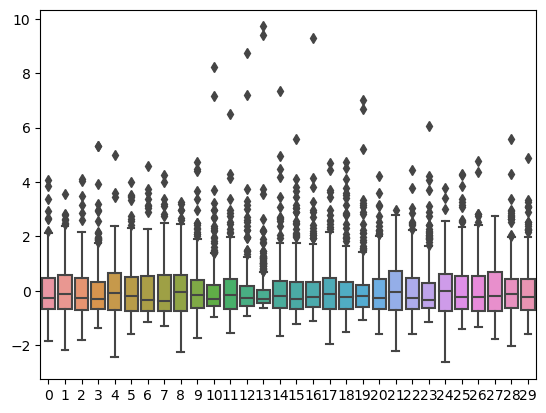

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
features = ['29','25','22','24','9','8','15','5','28','4','2']
sns.boxplot(data=X_train_std)
plt.show()

2. Create an instance of the different machine learning models (Perceptron, Logistic Regression, SVM, Decision Trees, KNN, and Random Forest.), example:`LogisticRegression` model:
```python
model = LogisticRegression()
```

In [10]:
#... instantiate your model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.9, solver='liblinear', multi_class='ovr')
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# stronger or weaker, respectively.


3. Fit the model to your training data:
```python
lr.fit(X_train, y_train.values.ravel())
```

4. Make predictions on your test data (this is different from compeition test data):
```python
y_pred = model.predict(X_test_scaled)
```

In [11]:
#... code
from sklearn.metrics import accuracy_score
lr.fit(X_train_std, y_train.values.ravel())
y_pred = lr.predict(X_test_std)

5. Evaluate the model's accuracy on your own test subset:
```python
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
```

In [12]:
# ... code
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9927007299270073


Running the regression again with minMax regulaization; however, the standard regulaization above performs better

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1, solver='liblinear', multi_class='ovr')
lr.fit(X_train_minMax, y_train.values.ravel())
predictions = lr.predict(X_test_minMax)
accuracy = accuracy_score(y_test, predictions)
print('Training accuracy:', lr.score(X_train_minMax, y_train))
print('Test accuracy:', lr.score(X_test_minMax, y_test))


Training accuracy: 0.9685534591194969
Test accuracy: 0.9854014598540146


# Testing your model on the actual competion test set for submission!

To make predictions on the test data and create the submission file, you can follow these steps:

1. Load the test data from the `test.csv` file:
```python
test_data = pd.read_csv('test.csv')
```

In [14]:
test_data = pd.read_csv('/kaggle/input/breast-cancer-classification-map-6990-mini-kaggle/test.csv')

2. Preprocess the test data to ensure it has the same features as the training data. This may involve handling missing values, encoding categorical variables, or scaling numerical features.

In [15]:
test_data.head()

,0,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,ID
0,87930,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,...,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750,205
1,859575,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,...,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589,71
2,8670,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,...,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019,132
3,907915,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,...,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,432
4,921385,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,...,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,541


You may need to pre-process test data provided to you. (think why? or why not? and how?)

In [16]:
# test_data_prep = ...
test_data_prep = test_data.drop(columns=["0","ID"])

In [17]:
# test_data_prep.head()
test_data_prep.head()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
1,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
2,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
3,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
4,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134


In [18]:
test_data_prep.describe()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,14.165833,19.707193,92.315439,656.930702,0.098820,0.107221,0.088405,0.051471,0.181414,0.062961,...,16.405237,26.242105,107.892193,894.935965,0.135707,0.260345,0.262585,0.116299,0.288373,0.084257
std,3.491876,4.432655,24.310746,341.074645,0.014415,0.054297,0.081070,0.041715,0.027240,0.006457,...,4.939138,6.456743,34.640172,578.333677,0.021581,0.166857,0.206139,0.067596,0.056683,0.018967
min,6.981000,10.940000,43.790000,143.500000,0.068280,0.035580,0.000000,0.000000,0.106000,0.052660,...,7.930000,12.490000,50.410000,185.200000,0.087990,0.054940,0.000000,0.000000,0.156600,0.059050
25%,11.687500,16.217500,75.225000,418.625000,0.088968,0.069655,0.030053,0.019842,0.163175,0.058428,...,12.850000,21.260000,84.012500,505.750000,0.121975,0.150850,0.102495,0.069250,0.251600,0.072400
50%,13.465000,19.535000,87.380000,548.700000,0.099085,0.097565,0.062960,0.033950,0.179400,0.061580,...,14.945000,25.790000,97.155000,681.200000,0.135850,0.215550,0.228450,0.101500,0.280850,0.079750
75%,16.057500,22.675000,105.300000,806.800000,0.106950,0.127800,0.119300,0.072967,0.193925,0.066405,...,19.695000,30.042500,129.175000,1211.000000,0.145175,0.316275,0.369850,0.166950,0.318925,0.092120
max,25.220000,31.120000,171.500000,1878.000000,0.137100,0.345400,0.375400,0.184500,0.290600,0.082430,...,32.490000,47.160000,214.000000,3432.000000,0.222600,1.058000,1.105000,0.286700,0.544000,0.207500


You may need to scale the test data as well right, how would you do that if you need that ;)?

In [19]:
# test_data_prep_scaled = ...
test_data_prep_scaled = stdsc.fit_transform(test_data_prep)

3. Make predictions on the test data using the trained logistic regression model:
```python
predictions = model.predict(test_data_prep_scaled)
```

In [20]:
#predictions = lr.predict(test_data_prep_scaled)

4. Create a submission DataFrame that includes the ID column from the test data and the corresponding predictions:
```python
submission_data = pd.DataFrame({'ID': test_data['ID'], 'target': predictions})
```

In [21]:
#submission_data = pd.DataFrame({'ID': test_data['ID'], 'target': predictions})

5. Save the submission DataFrame as a CSV file named `submission.csv`:
```python
submission_data.to_csv('submission.csv', index=False)
```

In [22]:
#submission_data.to_csv('submission.csv', index=False)

# Trying other models and checking their accuracy scores

## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion="gini",)

forest.fit(X_train, y_train.values.ravel())
predictions = forest.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print('Misclassified examples: %d' % (y_test != predictions).sum())

Accuracy: 0.9781021897810219
Misclassified examples: 3


## SVM

In [24]:
from sklearn import svm

# Create an SVM classifier with linear kernel
svm_linear = svm.SVC(kernel='linear',gamma='auto')

# Fit the classifier to your training data
svm_linear.fit(X_train, y_train)

# Predict on test data
predictions_linear = svm_linear.predict(X_test)
accuracy = accuracy_score(y_test, predictions_linear)
print("Accuracy:", accuracy)
print('Misclassified examples: %d' % (y_test != predictions).sum())

Accuracy: 0.9854014598540146
Misclassified examples: 3


## NeuralNet

In [25]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(max_iter=600,activation='identity')
nn.fit(X_train, y_train.values.ravel())
predictions = nn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print('Misclassified examples: %d' % (y_test != predictions).sum())

Accuracy: 0.927007299270073
Misclassified examples: 10


## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train.values.ravel())
predictions = knn.predict(X_test_std)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print('Misclassified examples: %d' % (y_test != predictions).sum())


Accuracy: 0.9781021897810219
Misclassified examples: 3


## Perceptron

In [27]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
predictions = ppn.predict(X_test_std)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print('Misclassified examples: %d' % (y_test != predictions).sum())

Accuracy: 0.9854014598540146
Misclassified examples: 2


## Voting Classifier

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=100, random_state=1)
clf3 = GaussianNB()
vc = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
vc.fit(X_train_std, y_train.values.ravel())
predictions = vc.predict(X_test_std)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9927007299270073


# Sequential feature selection algorithms

In [29]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

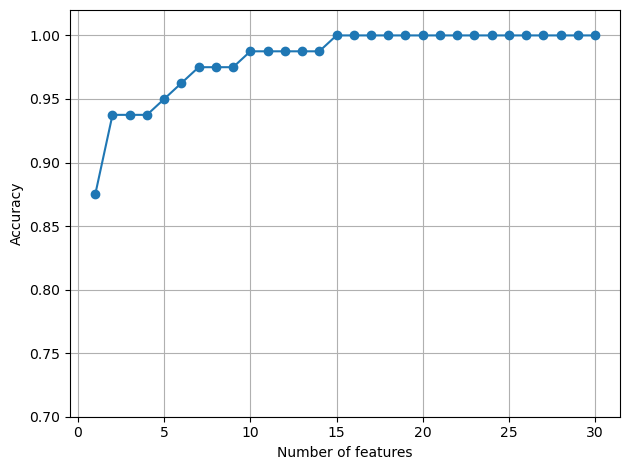

In [30]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show()

In [31]:
k3 = list(sbs.subsets_[15])
print(X_train.columns[:][k3])

Index(['2', '3', '4', '5', '6', '8', '9', '11', '12', '13', '16', '17', '22',
       '26', '27'],
      dtype='object')


In [32]:
k3 = list(sbs.subsets_[15])
knn.fit(X_train_std[:, k3], y_train)
predictions = knn.predict(X_test_std[:, k3])
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))
print('Misclassified examples: %d' % (y_test != predictions).sum())

Training accuracy: 0.9685534591194969
Test accuracy: 0.9781021897810219
Misclassified examples: 3


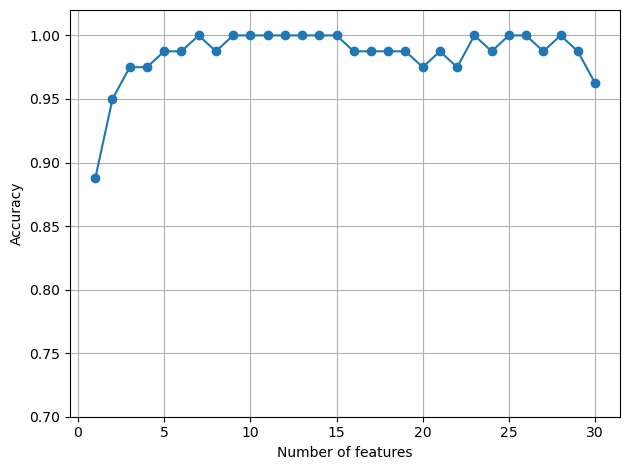

In [33]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion="gini")

# selecting features
sbs = SBS(forest, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show()

In [34]:
k3 = list(sbs.subsets_[23])
forest.fit(X_train_std[:, k3], y_train)
predictions = forest.predict(X_test_std[:, k3])
print('Training accuracy:', forest.score(X_train_std[:, k3], y_train))
print('Test accuracy:', forest.score(X_test_std[:, k3], y_test))
print('Misclassified examples: %d' % (y_test != predictions).sum())

Training accuracy: 1.0
Test accuracy: 0.9781021897810219
Misclassified examples: 3


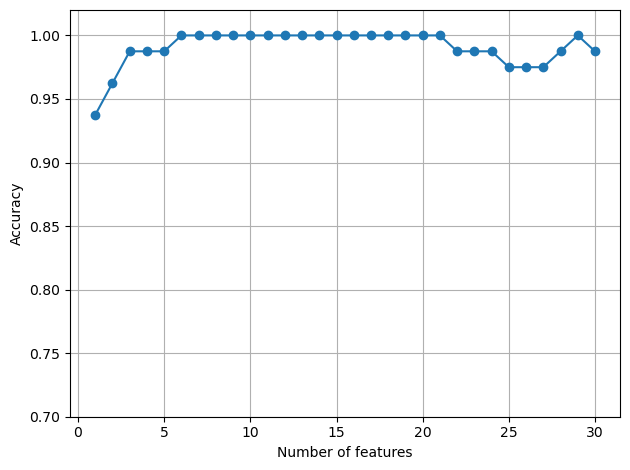

In [35]:
# selecting features
sbs = SBS(vc, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show()


In [36]:
k3 = list(sbs.subsets_[24])
vc.fit(X_train_std[:, k3], y_train)
predictions = vc.predict(X_test_std[:, k3])
print('Training accuracy:', vc.score(X_train_std[:, k3], y_train))
print('Test accuracy:', vc.score(X_test_std[:, k3], y_test))
print('Misclassified examples: %d' % (y_test != predictions).sum())

Training accuracy: 0.9654088050314465
Test accuracy: 0.9562043795620438
Misclassified examples: 6


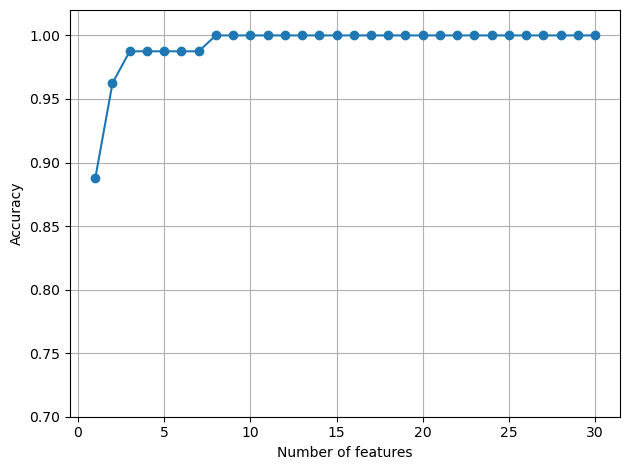

In [37]:
import matplotlib.pyplot as plt
from sklearn import svm

# Create an SVM classifier with linear kernel
svm_linear = svm.SVC(kernel='linear',gamma='auto')


# selecting features
sbs = SBS(svm_linear, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show()

In [38]:
k3 = list(sbs.subsets_[22])
svm_linear.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', svm_linear.score(X_train_std[:, k3], y_train))
print('Test accuracy:', svm_linear.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9654088050314465
Test accuracy: 0.9562043795620438


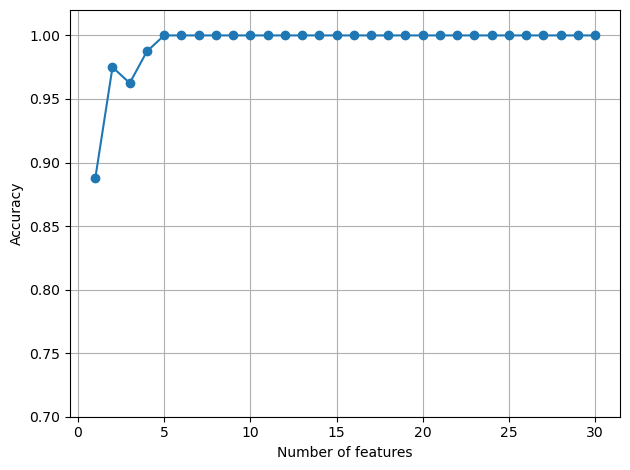

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.9, solver='liblinear', multi_class='ovr')

# selecting features
sbs = SBS(lr, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show()

In [40]:
k3 = list(sbs.subsets_[24])
lr.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', lr.score(X_train_std[:, k3], y_train))
print('Test accuracy:', lr.score(X_test_std[:, k3], y_test))
predictions = lr.predict(X_test_std[:, k3])
print('Misclassified examples: %d' % (y_test != predictions).sum())

Training accuracy: 0.9559748427672956
Test accuracy: 0.9635036496350365
Misclassified examples: 5


# Selection based on feature performance

Building random forest classifier and outputting feature by importance in desc order + plt

 1) 29                             0.131639
 2) 9                              0.125393
 3) 24                             0.115556
 4) 22                             0.110360
 5) 25                             0.098590
 6) 4                              0.046294
 7) 5                              0.045058
 8) 8                              0.043607
 9) 2                              0.041326
10) 28                             0.037447
11) 15                             0.025252
12) 30                             0.020429
13) 3                              0.018460
14) 23                             0.018283
15) 26                             0.012693
16) 12                             0.011782
17) 27                             0.011559
18) 14                             0.011237
19) 7                              0.011228
20) 6                              0.007811
21) 31                             0.006862
22) 16                             0.006011
23) 18                          

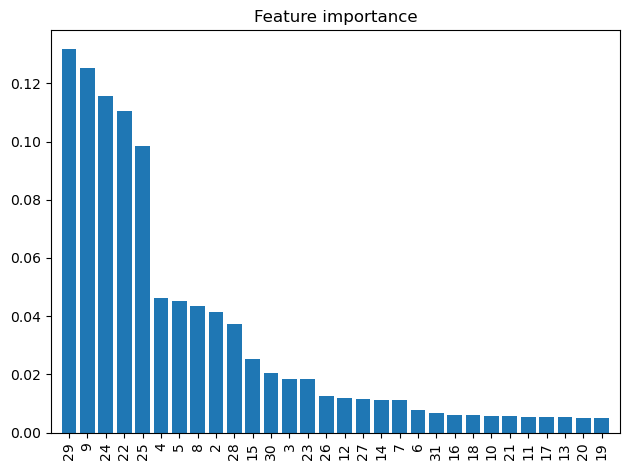

In [41]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = X_train.columns

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)
plt.show()

## Training random forests based on top features in importance to test accuracy scores

In [42]:
forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

features = ['29','25','22','24','9','8','15','5','28','4','2']

forest.fit(X_train[features], y_train)
print('Training accuracy:', forest.score(X_train[features], y_train))
print('Test accuracy:', forest.score(X_test[features], y_test))

Training accuracy: 1.0
Test accuracy: 0.9708029197080292


In [43]:
forest = RandomForestClassifier(n_estimators=3,
                                random_state=1)

features = ['29','25','22','24','9','8']

forest.fit(X_train[features], y_train)
print('Training accuracy:', forest.score(X_train[features], y_train))
print('Test accuracy:', forest.score(X_test[features], y_test))


Training accuracy: 0.9842767295597484
Test accuracy: 0.9343065693430657


# Using chi squared for feature selection

In [44]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2
forest = RandomForestClassifier(n_estimators=75,
                                random_state=1)
transformer = GenericUnivariateSelect(chi2, mode='k_best', param=20)
X_new = transformer.fit_transform(X_train, y_train)
forest.fit(X_new, y_train)
print('Training accuracy:', forest.score(X_new, y_train))
print('Test accuracy:', forest.score(transformer.transform(X_test), y_test))


Training accuracy: 1.0
Test accuracy: 0.9781021897810219


# Top model created is the LogisticRegression from the start.

## Recreating Logistic Regression and sumbitting scores

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train.values.ravel())
predictions = lr.predict(X_test_std)
accuracy = accuracy_score(y_test, predictions)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))
print('Misclassified examples: %d' % (y_test != predictions).sum())
print('Total Predictions:', sum(predictions))

Training accuracy: 0.9874213836477987
Test accuracy: 0.9927007299270073
Misclassified examples: 1
Total Predictions: 50


In [46]:
predictions = lr.predict(test_data_prep_scaled)

In [47]:
submission_data = pd.DataFrame({'ID': test_data['ID'], 'target': predictions})

In [48]:
submission_data.to_csv('submission.csv', index=False)